<a href="https://colab.research.google.com/github/MrBigBrane/Machine-Learning/blob/main/FFN_Overcomplicated_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

nn (3).svg

In [ ]:
# initialize samples
numSamples = 1500

samples = torch.randint(-10, 11, (numSamples,2), dtype=torch.float32)

# "labels"
labels = torch.sum(samples,axis=1,keepdim=True)

In [ ]:
# create a class for the model
def createTheCalculatorNet():

  class calculatorNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(2,15)

      ### output layer
      self.output = nn.Linear(15,1)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      return self.output(x)

  # create the model instance
  net = calculatorNet()

  # loss function
  lossfun = nn.MSELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [ ]:
def function2trainTheModel(net):

  # number of epochs
  numepochs = 10

  # create a new model


  # initialize losses
  losses   = torch.zeros(numepochs)
  batchLoss = []
  trueVal = torch.zeros(numSamples)
  predVal = torch.zeros(numSamples)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):
    for i in range(numSamples):
      # forward pass
      net.train()
      calcNumbers = samples[i]

      pred = net(calcNumbers)
      loss = lossfun(pred, labels[i])

      batchLoss.append(loss.item())

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    with torch.no_grad():
      pred = net(samples)

    # calculate accuracy based on being within 1 of true label
    accuracyTrain = 100*torch.mean((np.abs(labels - pred) < 1).float())
    trainAcc.append( accuracyTrain.numpy())

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    newSamples = torch.randint(-10, 11, (numSamples,2), dtype=torch.float32)
    newLabels = torch.sum(newSamples,axis=1,keepdim=True)
    with torch.no_grad(): # deactivates autograd
      pred = net(newSamples)

    # residualAccuracy = labels - pred == 0
    accuracyTest = 100*torch.mean((np.abs(newLabels - pred) < 1).float())
    testAcc.append( accuracyTest.numpy())

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


In [ ]:
# Create 10 instances of the model and check train/test accuracy
for i in range(10):
  net,lossfun,optimizer = createTheCalculatorNet()
  trainAcc,testAcc,losses,net = function2trainTheModel(net)
  print(trainAcc[-1], testAcc[-1])

100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0
100.0 100.0


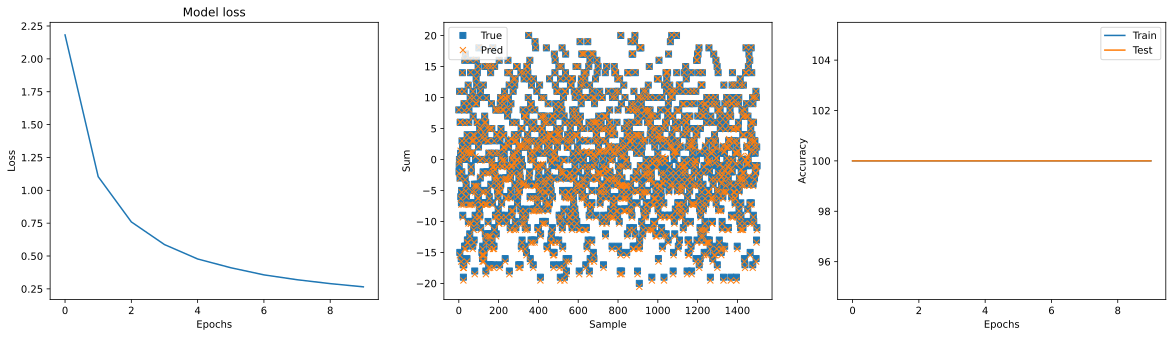

In [ ]:
pred = net(samples)

fig,ax = plt.subplots(1,3,figsize=(20,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(labels, 's', label='True')
ax[1].plot(pred.detach().numpy(), 'x', label='Pred')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Sum')
ax[1].legend()

ax[2].plot(trainAcc,label='Train')
ax[2].plot(testAcc,label='Test')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Accuracy')
ax[2].legend()

plt.show()